In [33]:
import pandas as pd
from utility_functions import cross_validate_and_save_model, vectorize, evaluate,get_confused_samples
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Split data
into training and test sets

In [2]:
df = pd.read_csv(f'../data/6 - Classification data/full_classification_df.csv')
df.dropna(subset=['NonStopwordsQuoteText'],inplace=True)
df.head()

,Type,QuoteWordCount,QuoteLen,StartDate,Speaker,QuoteText,NonStopwordsQuoteText,Tag
0,Committee,114.0,690.0,2022-01-17 12:00:00,"<< יור >> היו""ר אפרת רייטן מרום: << יור >>",בשיחות שקיימתי עם האוצר ובשיחות שקיימתי אם יוש...,בשיחות שקיימתי האוצר ובשיחות שקיימתי יושב-ראש ...,כלכלי
1,Committee,114.0,690.0,2022-01-17 12:00:00,"<< יור >> היו""ר אפרת רייטן מרום: << יור >>",בשיחות שקיימתי עם האוצר ובשיחות שקיימתי אם יוש...,בשיחות שקיימתי האוצר ובשיחות שקיימתי יושב-ראש ...,כלכלי
2,Committee,110.0,625.0,2021-03-03 14:00:00,<< דובר >> מיכל וונש (כחול לבן): << דובר >>,"כן בהקשר הנכון, אדוני היושב-ראש, כיוון שהביקור...",בהקשר הנכון היושב-ראש כיוון שהביקורת הסגירה הס...,קורונה
3,Committee,133.0,696.0,2017-02-21 11:00:00,"היו""ר דוד אמסלם:","אני אומר בגדול, בסך הכול יש לנו אתרים מקודשים ...",בגדול בסך הכול אתרים מקודשים לעם היהודי לעם הי...,בלי
4,Committee,113.0,577.0,2017-02-20 10:30:00,"היו""ר קארין אלהרר:","תראו, אנחנו עוסקים היום בנושא כאוב ועצוב. הוא ...",תראו עוסקים כאוב ועצוב כאוב ועצוב פעמיים רשלנו...,בריאות


In [3]:
X = df['QuoteText']
y = df['Tag']
names = ["X_train", "X_test", "y_train", "y_test"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for name, data in enumerate([X_train, X_test, y_train, y_test]):
    data.reset_index(drop=True, inplace=True)
    data.to_csv(f'../data/6 - Classification data/{names[name]}.csv', index=0)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

print("Tags distribution:\n")
print("train tags\n", y_train.value_counts(), "\n")
print("test tags\n", y_test.value_counts())

Tags distribution:

train tags
 בלי           826
קורונה        176
חינוך         176
רווחה         160
כלכלי         140
בריאות        138
נשים          128
בטחון פנים     76
בטחון          73
Name: Tag, dtype: int64 

test tags
 בלי           209
כלכלי          46
נשים           40
חינוך          38
קורונה         35
רווחה          31
בטחון          26
בטחון פנים     26
בריאות         23
Name: Tag, dtype: int64


## Vectorize data

In [4]:
X_train_counts, X_test_counts = vectorize(X_train, X_test,"simple_counts")
X_train_tfidf, X_test_tfidf = vectorize(X_train, X_test,"tfidf")

simple counts: 1893 quotes, 68046 words in train set
TFIDF: 1893 quotes, 68046 words in train set


# Classificaiton models
## Logistic Regression
#### Logistic Regression with simple counts

In [5]:
logistic_simple_model, logistic_simple_predicted = cross_validate_and_save_model(LogisticRegression(), X_train_counts, y_train, X_test_counts, kf, scoring, 'logistic_simple_counts',1)

cross validation scores (5fold) for logistic_simple_counts:
accuracy: 0.6069564853206014
precision_macro: 0.7803821871653419
recall_macro: 0.3816708466122071
f1_macro: 0.4449777058760958


In [6]:
logistic_c2_simple_model, logistic_c2_simple_predicted = cross_validate_and_save_model(LogisticRegression(C=2), X_train_counts, y_train, X_test_counts, kf, scoring, 'logistic_c2_simple_counts',1)

cross validation scores (5fold) for logistic_c2_simple_counts:
accuracy: 0.6095977998352667
precision_macro: 0.770597642315987
recall_macro: 0.3850254852680082
f1_macro: 0.44835621564671635


In [7]:
logistic_c05_simple_model, logistic_c05_simple_predicted = cross_validate_and_save_model(LogisticRegression(C=0.5), X_train_counts, y_train, X_test_counts, kf, scoring, 'logistic_c05_simple_counts',1)

cross validation scores (5fold) for logistic_c05_simple_counts:
accuracy: 0.604315170805936
precision_macro: 0.7873789244969656
recall_macro: 0.3740188825625791
f1_macro: 0.43653265000086156


#### Logistic Regression with TFIDF

In [8]:
logistic_tfidf_model, logistic_tfidf_predicted = cross_validate_and_save_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'logistic_tfidf_counts',1)

cross validation scores (5fold) for logistic_tfidf_counts:
accuracy: 0.5430358364395304
precision_macro: 0.5593862612495226
recall_macro: 0.27163905235820585
f1_macro: 0.2978146167937452


In [9]:
logistic_c05_tfidf_model, logistic_c05_tfidf_predicted = cross_validate_and_save_model(LogisticRegression(C=0.5), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'logistic_c05_tfidf_counts',1)

cross validation scores (5fold) for logistic_c05_tfidf_counts:
accuracy: 0.527712861749801
precision_macro: 0.4629107195900633
recall_macro: 0.2461300176158681
f1_macro: 0.26249069428248195


## Random Forest
#### Random forest with simple counts

In [10]:
forest_30_100_simple_model, forest_30_100_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=30, max_depth=100), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_30_100_simple_counts',1)

cross validation scores (5fold) for forest_30_100_simple_counts:
accuracy: 0.5752648992754533
precision_macro: 0.7236758188477521
recall_macro: 0.33228726385009866
f1_macro: 0.37747382516281586


In [11]:
forest_100_100_simple_model, forest_100_100_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=100), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_100_100_simple_counts',1)

cross validation scores (5fold) for forest_100_100_simple_counts:
accuracy: 0.5794809509849087
precision_macro: 0.6770275781074309
recall_macro: 0.33575285287772766
f1_macro: 0.3765165624298984


In [12]:
forest_200_100_simple_model, forest_200_100_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=200, max_depth=100), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_200_100_simple_counts',1)

cross validation scores (5fold) for forest_200_100_simple_counts:
accuracy: 0.57420530217364
precision_macro: 0.6929770421655209
recall_macro: 0.32794693033295036
f1_macro: 0.36993339489303195


In [13]:
forest_100_200_simple_model, forest_100_200_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=200), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_100_200_simple_counts',1)

cross validation scores (5fold) for forest_100_200_simple_counts:
accuracy: 0.6006198433639066
precision_macro: 0.7643757034648017
recall_macro: 0.36912786342831216
f1_macro: 0.4213890197017657


In [14]:
forest_100_1000_simple_model, forest_100_1000_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=1000), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_100_1000_simple_counts',1)

cross validation scores (5fold) for forest_100_1000_simple_counts:
accuracy: 0.599563038349318
precision_macro: 0.7507779558871309
recall_macro: 0.3683350393446505
f1_macro: 0.4236569408948295


In [15]:
forest_150_1000_simple_model, forest_150_1000_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=150, max_depth=1000), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_150_1000_simple_counts',1)

cross validation scores (5fold) for forest_150_1000_simple_counts:
accuracy: 0.6053691837333
precision_macro: 0.7559689112751797
recall_macro: 0.3781344303279372
f1_macro: 0.4347429137144454


#### Random forest with TFIDF

In [16]:
forest_100_200_tfidf_model, forest_100_200_tfidf_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=200), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'forest_100_200_tfidf_counts',1)

cross validation scores (5fold) for forest_100_200_tfidf_counts:
accuracy: 0.5937541008781115
precision_macro: 0.7920521681670912
recall_macro: 0.364146187713404
f1_macro: 0.41855401083097643


In [17]:
forest_100_1000_tfidf_model, forest_100_1000_tfidf_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=1000), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'forest_100_1000_tfidf_counts',1)

cross validation scores (5fold) for forest_100_1000_tfidf_counts:
accuracy: 0.5932222082617862
precision_macro: 0.7652037386409032
recall_macro: 0.362087661443
f1_macro: 0.4175469533880764


## SVM
#### SVM with simple counts

In [18]:
svm_simple_model, svm_simple_predicted = cross_validate_and_save_model(svm.SVC(), X_train_counts, y_train, X_test_counts, kf, scoring, 'svm_simple_counts',1)

cross validation scores (5fold) for svm_simple_counts:
accuracy: 0.530890257011629
precision_macro: 0.4731182380399912
recall_macro: 0.2578522722867941
f1_macro: 0.2788326520424068


#### SVM with TFIDF

In [19]:
svm_tfidf_model, svm_tfidf_predicted = cross_validate_and_save_model(svm.SVC(), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'svm_tfidf_counts',1)

cross validation scores (5fold) for svm_tfidf_counts:
accuracy: 0.5366991944828357
precision_macro: 0.6320117927681889
recall_macro: 0.26814293978594833
f1_macro: 0.2955528332184252


# Evaluation

In [20]:
quotes = X_test.reset_index()
quotes['true'] = y_test
mat_tags = ['בטחון','בטחון פנים','בלי','בריאות','חינוך','כלכלי','נשים','קורונה','רווחה']
quotes

,index,QuoteText,true
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך
1,1,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת העבוד...",בלי
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה
3,3,בוקר טוב לכולם. אנחנו פותחים את הישיבה. הנושא ...,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה
...,...,...,...
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה
471,471,"אני בדקתי נתונים במסגרת ועדת הכספים, כי אני מש...",בלי
472,472,"אנחנו נשמע מנציגת הממ""מ בכנסת, מריה רבינוביץ, ...",בלי


## Logistic regression

-------Logistic Regression simple counts, C=1) Evaluation-------
Micro:
precision: 0.609704641350211
recall: 0.609704641350211
f1: 0.609704641350211

Macro:
precision: 0.7664328103418788
recall: 0.4028172714320939
f1: 0.4674714349806918

Accuracy: 0.609704641350211

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 161 of 185 (87.02702702702703%)

Distribution of misclassified topics:
בלי       161
קורונה      6
כלכלי       5
רווחה       4
חינוך       4
בריאות      3
בטחון       1
נשים        1
Name: predicted, dtype: int64


,index,QuoteText,true,predicted
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך,בלי
1,1,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת העבוד...",בלי,קורונה
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה,בלי
5,5,"יש לי חוק על כפל הגמלאות שנמצא בדיון, שדיברנו ...",כלכלי,בלי
...,...,...,...,...
463,463,"תודה רבה, גברתי יושבת-הראש. אני רוצה לברך על ק...",רווחה,בלי
468,468,לפני הכל אני באמת מבקש להשתתף בצערם של משפחות ...,בטחון פנים,בלי
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות,בלי
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה,בריאות


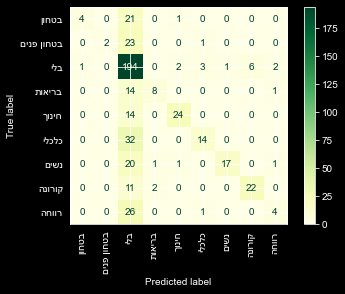

In [67]:
evaluate("-------Logistic Regression simple counts, C=1) Evaluation-------",y_test,logistic_simple_predicted,mat_tags)
get_confused_samples(quotes,logistic_simple_predicted)

-------Logistic Regression simple counts, C=2) Evaluation-------
Micro:
precision: 0.6139240506329114
recall: 0.6139240506329114
f1: 0.6139240506329114

Macro:
precision: 0.7732745580914161
recall: 0.40917927860055264
f1: 0.4753917223705673

Accuracy: 0.6139240506329114

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 159 of 183 (86.88524590163934%)

Distribution of misclassified topics:
בלי       159
קורונה      6
כלכלי       5
רווחה       4
חינוך       4
בריאות      3
בטחון       1
נשים        1
Name: predicted, dtype: int64


,index,QuoteText,true,predicted
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך,בלי
1,1,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת העבוד...",בלי,קורונה
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה,בלי
5,5,"יש לי חוק על כפל הגמלאות שנמצא בדיון, שדיברנו ...",כלכלי,בלי
...,...,...,...,...
463,463,"תודה רבה, גברתי יושבת-הראש. אני רוצה לברך על ק...",רווחה,בלי
468,468,לפני הכל אני באמת מבקש להשתתף בצערם של משפחות ...,בטחון פנים,בלי
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות,בלי
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה,בריאות


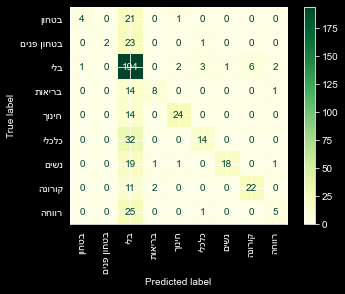

In [69]:
evaluate("-------Logistic Regression simple counts, C=2) Evaluation-------",y_test,logistic_c2_simple_predicted,mat_tags)
get_confused_samples(quotes,logistic_c2_simple_predicted)

-------Logistic Regression simple counts, C=0.5) Evaluation-------
Micro:
precision: 0.6033755274261603
recall: 0.6033755274261603
f1: 0.6033755274261603

Macro:
precision: 0.7663243254873259
recall: 0.38946245945027963
f1: 0.45000767205278014

Accuracy: 0.6033755274261603

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 166 of 188 (88.29787234042553%)

Distribution of misclassified topics:
בלי       166
קורונה      6
רווחה       4
כלכלי       4
חינוך       3
בריאות      3
בטחון       1
נשים        1
Name: predicted, dtype: int64


,index,QuoteText,true,predicted
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך,בלי
1,1,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת העבוד...",בלי,קורונה
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה,בלי
5,5,"יש לי חוק על כפל הגמלאות שנמצא בדיון, שדיברנו ...",כלכלי,בלי
...,...,...,...,...
463,463,"תודה רבה, גברתי יושבת-הראש. אני רוצה לברך על ק...",רווחה,בלי
468,468,לפני הכל אני באמת מבקש להשתתף בצערם של משפחות ...,בטחון פנים,בלי
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות,בלי
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה,בריאות


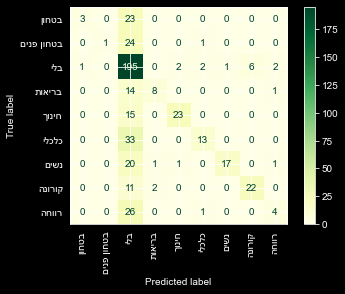

In [70]:
evaluate("-------Logistic Regression simple counts, C=0.5) Evaluation-------",y_test,logistic_c05_simple_predicted,mat_tags)
get_confused_samples(quotes,logistic_c05_simple_predicted)

-------Logistic Regression TFIDF counts, C=1) Evaluation-------
Micro:
precision: 0.5759493670886076
recall: 0.5759493670886076
f1: 0.5759493670886076

Macro:
precision: 0.6300598715917344
recall: 0.33691756272401435
f1: 0.3765633219691174

Accuracy: 0.5759493670886076

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 186 of 201 (92.53731343283582%)

Distribution of misclassified topics:
בלי       186
קורונה      6
חינוך       4
כלכלי       2
בריאות      2
נשים        1
Name: predicted, dtype: int64


,index,QuoteText,true,predicted
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך,בלי
1,1,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת העבוד...",בלי,קורונה
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה,בלי
5,5,"יש לי חוק על כפל הגמלאות שנמצא בדיון, שדיברנו ...",כלכלי,בלי
...,...,...,...,...
463,463,"תודה רבה, גברתי יושבת-הראש. אני רוצה לברך על ק...",רווחה,בלי
468,468,לפני הכל אני באמת מבקש להשתתף בצערם של משפחות ...,בטחון פנים,בלי
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות,בלי
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה,בלי


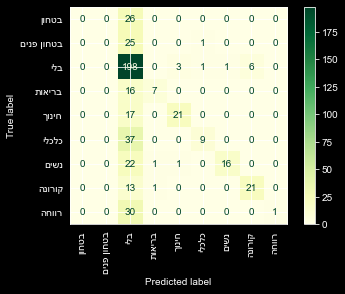

In [71]:
evaluate("-------Logistic Regression TFIDF counts, C=1) Evaluation-------",y_test,logistic_tfidf_predicted,mat_tags)
get_confused_samples(quotes,logistic_tfidf_predicted)

-------Logistic Regression TFIDF counts, C=0.5) Evaluation-------
Micro:
precision: 0.5569620253164557
recall: 0.5569620253164557
f1: 0.5569620253164557

Macro:
precision: 0.5105669081811214
recall: 0.30286404416839197
f1: 0.3329053562802849

Accuracy: 0.5569620253164557

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 196 of 210 (93.33333333333333%)

Distribution of misclassified topics:
בלי       196
קורונה      6
חינוך       4
כלכלי       2
נשים        1
בריאות      1
Name: predicted, dtype: int64


,index,QuoteText,true,predicted
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך,בלי
1,1,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת העבוד...",בלי,קורונה
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה,בלי
5,5,"יש לי חוק על כפל הגמלאות שנמצא בדיון, שדיברנו ...",כלכלי,בלי
...,...,...,...,...
463,463,"תודה רבה, גברתי יושבת-הראש. אני רוצה לברך על ק...",רווחה,בלי
468,468,לפני הכל אני באמת מבקש להשתתף בצערם של משפחות ...,בטחון פנים,בלי
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות,בלי
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה,בלי


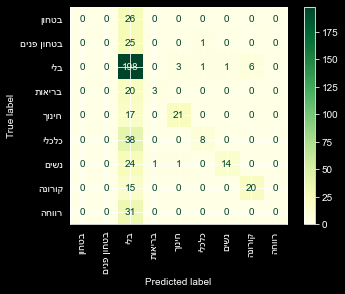

In [72]:
evaluate("-------Logistic Regression TFIDF counts, C=0.5) Evaluation-------",y_test,logistic_c05_tfidf_predicted,mat_tags)
get_confused_samples(quotes,logistic_c05_tfidf_predicted)

## Random forest

-----Random forest with simple counts, 100 trees, max depth 200) Evaluation-----
Micro:
precision: 0.5843881856540084
recall: 0.5843881856540084
f1: 0.5843881856540084

Macro:
precision: 0.6668008288008288
recall: 0.3544839388771625
f1: 0.39997714045318633

Accuracy: 0.5843881856540084

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 178 of 197 (90.35532994923858%)

Distribution of misclassified topics:
בלי       178
קורונה      5
חינוך       4
בריאות      4
רווחה       3
כלכלי       2
נשים        1
Name: predicted, dtype: int64


,index,QuoteText,true,predicted
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך,בלי
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה,בלי
5,5,"יש לי חוק על כפל הגמלאות שנמצא בדיון, שדיברנו ...",כלכלי,בלי
13,13,מצד אחד יש כאן חוק חשוב שאנחנו רוצים שייצר עתו...,רווחה,בלי
...,...,...,...,...
464,464,בשיח שהתקיים בשבועות האחרונים בתוך כותלי הכנסת...,חינוך,בלי
468,468,לפני הכל אני באמת מבקש להשתתף בצערם של משפחות ...,בטחון פנים,בלי
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות,בלי
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה,בריאות


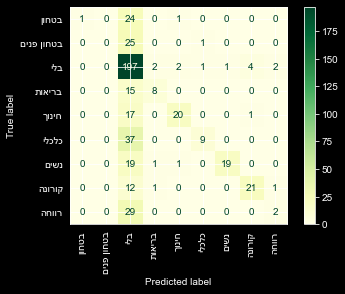

In [73]:
evaluate("-----Random forest with simple counts, 100 trees, max depth 200) Evaluation-----",y_test,forest_100_200_simple_predicted,mat_tags)
get_confused_samples(quotes,forest_100_200_simple_predicted)

-----Random forest with simple counts, 100 trees, max depth 1000) Evaluation-----
Micro:
precision: 0.5780590717299579
recall: 0.5780590717299579
f1: 0.5780590717299579

Macro:
precision: 0.6624420389034051
recall: 0.34724078157679694
f1: 0.39398946820019404

Accuracy: 0.5780590717299579

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 180 of 200 (90.0%)

Distribution of misclassified topics:
בלי       180
קורונה      6
חינוך       4
בריאות      4
רווחה       3
כלכלי       2
נשים        1
Name: predicted, dtype: int64


,index,QuoteText,true,predicted
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך,בלי
1,1,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת העבוד...",בלי,קורונה
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה,בלי
5,5,"יש לי חוק על כפל הגמלאות שנמצא בדיון, שדיברנו ...",כלכלי,בלי
...,...,...,...,...
464,464,בשיח שהתקיים בשבועות האחרונים בתוך כותלי הכנסת...,חינוך,בלי
468,468,לפני הכל אני באמת מבקש להשתתף בצערם של משפחות ...,בטחון פנים,בלי
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות,בלי
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה,בריאות


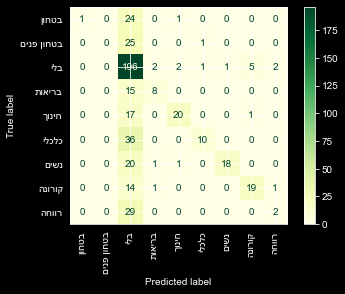

In [74]:
evaluate("-----Random forest with simple counts, 100 trees, max depth 1000) Evaluation-----",y_test,forest_100_1000_simple_predicted,mat_tags)
get_confused_samples(quotes,forest_100_1000_simple_predicted)

-----Random forest with simple counts, 150 trees, max depth 1000) Evaluation-----
Micro:
precision: 0.5949367088607594
recall: 0.5949367088607594
f1: 0.5949367088607594

Macro:
precision: 0.5627693590022358
recall: 0.37350434663308363
f1: 0.41461671892010005

Accuracy: 0.5949367088607594

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 170 of 192 (88.54166666666666%)

Distribution of misclassified topics:
בלי       170
קורונה      7
בריאות      5
חינוך       4
רווחה       3
כלכלי       2
נשים        1
Name: predicted, dtype: int64


,index,QuoteText,true,predicted
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך,בלי
1,1,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת העבוד...",בלי,קורונה
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה,בלי
5,5,"יש לי חוק על כפל הגמלאות שנמצא בדיון, שדיברנו ...",כלכלי,בלי
...,...,...,...,...
464,464,בשיח שהתקיים בשבועות האחרונים בתוך כותלי הכנסת...,חינוך,בלי
468,468,לפני הכל אני באמת מבקש להשתתף בצערם של משפחות ...,בטחון פנים,בלי
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות,בלי
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה,בריאות


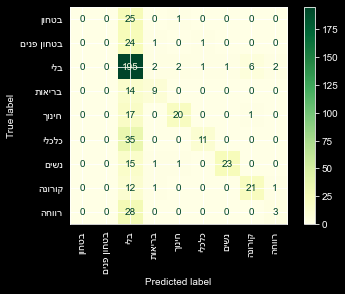

In [75]:
evaluate("-----Random forest with simple counts, 150 trees, max depth 1000) Evaluation-----",y_test,forest_150_1000_simple_predicted,mat_tags)
get_confused_samples(quotes,forest_150_1000_simple_predicted)

-----Random forest with TFIDF counts, 100 trees, max depth 200) Evaluation-----
Micro:
precision: 0.6012658227848101
recall: 0.6012658227848101
f1: 0.6012658227848101

Macro:
precision: 0.6855698005698005
recall: 0.38143519026186773
f1: 0.42866140779008627

Accuracy: 0.6012658227848101

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 168 of 189 (88.88888888888889%)

Distribution of misclassified topics:
בלי       168
קורונה      8
חינוך       4
בריאות      4
כלכלי       2
רווחה       2
נשים        1
Name: predicted, dtype: int64


,index,QuoteText,true,predicted
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך,בלי
1,1,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת העבוד...",בלי,קורונה
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה,בלי
5,5,"יש לי חוק על כפל הגמלאות שנמצא בדיון, שדיברנו ...",כלכלי,בלי
...,...,...,...,...
464,464,בשיח שהתקיים בשבועות האחרונים בתוך כותלי הכנסת...,חינוך,בלי
468,468,לפני הכל אני באמת מבקש להשתתף בצערם של משפחות ...,בטחון פנים,בלי
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות,בלי
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה,בריאות


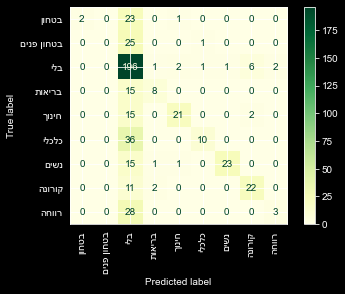

In [76]:
evaluate("-----Random forest with TFIDF counts, 100 trees, max depth 200) Evaluation-----",y_test,forest_100_200_tfidf_predicted,mat_tags)
get_confused_samples(quotes,forest_100_200_tfidf_predicted)

-----Random forest with TFIDF counts, 100 trees, max depth 1000) Evaluation-----
Micro:
precision: 0.5970464135021097
recall: 0.5970464135021097
f1: 0.5970464135021097

Macro:
precision: 0.6880427521128004
recall: 0.37171837516747824
f1: 0.42413898776061243

Accuracy: 0.5970464135021097

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 171 of 191 (89.52879581151832%)

Distribution of misclassified topics:
בלי       171
קורונה      8
בריאות      4
חינוך       3
כלכלי       2
רווחה       2
נשים        1
Name: predicted, dtype: int64


,index,QuoteText,true,predicted
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך,בלי
1,1,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת העבוד...",בלי,קורונה
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה,בלי
5,5,"יש לי חוק על כפל הגמלאות שנמצא בדיון, שדיברנו ...",כלכלי,בלי
...,...,...,...,...
464,464,בשיח שהתקיים בשבועות האחרונים בתוך כותלי הכנסת...,חינוך,בלי
468,468,לפני הכל אני באמת מבקש להשתתף בצערם של משפחות ...,בטחון פנים,בלי
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות,בלי
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה,בריאות


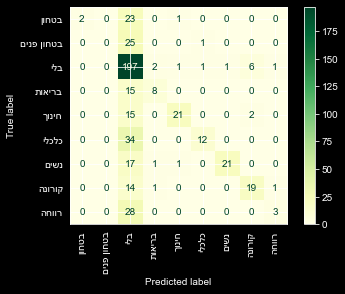

In [77]:
evaluate("-----Random forest with TFIDF counts, 100 trees, max depth 1000) Evaluation-----",y_test,forest_100_1000_tfidf_predicted,mat_tags)
get_confused_samples(quotes,forest_100_1000_tfidf_predicted)

## SVM

-----SVM with simple counts Evaluation-----
Micro:
precision: 0.5569620253164557
recall: 0.5569620253164557
f1: 0.5569620253164557

Macro:
precision: 0.53764064697609
recall: 0.30246721877156657
f1: 0.33420299347451665

Accuracy: 0.5569620253164557

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 197 of 210 (93.80952380952381%)

Distribution of misclassified topics:
בלי       197
קורונה      6
חינוך       4
כלכלי       2
נשים        1
Name: predicted, dtype: int64


,index,QuoteText,true,predicted
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך,בלי
1,1,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת העבוד...",בלי,קורונה
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה,בלי
5,5,"יש לי חוק על כפל הגמלאות שנמצא בדיון, שדיברנו ...",כלכלי,בלי
...,...,...,...,...
463,463,"תודה רבה, גברתי יושבת-הראש. אני רוצה לברך על ק...",רווחה,בלי
468,468,לפני הכל אני באמת מבקש להשתתף בצערם של משפחות ...,בטחון פנים,בלי
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות,בלי
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה,בלי


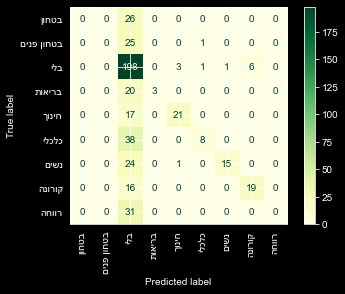

In [78]:
evaluate("-----SVM with simple counts Evaluation-----",y_test, svm_simple_predicted,mat_tags)
get_confused_samples(quotes,svm_simple_predicted)

-----SVM with TFIDF counts Evaluation-----
Micro:
precision: 0.5675105485232067
recall: 0.5675105485232067
f1: 0.5675105485232067

Macro:
precision: 0.629772408630214
recall: 0.32000935016362786
f1: 0.35573616217393433

Accuracy: 0.5675105485232067

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 191 of 205 (93.17073170731707%)

Distribution of misclassified topics:
בלי       191
קורונה      6
חינוך       4
כלכלי       2
נשים        1
בריאות      1
Name: predicted, dtype: int64


,index,QuoteText,true,predicted
0,0,"לעניין זה זימנתי את הדיון היום, כדי לראות קודם...",חינוך,בלי
1,1,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת העבוד...",בלי,קורונה
2,2,תודה רבה לכם שבאתם. אנחנו מתשע בבוקר בכל ועדות...,רווחה,בלי
4,4,שני המהלכים הללו קשורים בחוות הדעת האפידמיולוג...,קורונה,בלי
5,5,"יש לי חוק על כפל הגמלאות שנמצא בדיון, שדיברנו ...",כלכלי,בלי
...,...,...,...,...
463,463,"תודה רבה, גברתי יושבת-הראש. אני רוצה לברך על ק...",רווחה,בלי
468,468,לפני הכל אני באמת מבקש להשתתף בצערם של משפחות ...,בטחון פנים,בלי
469,469,אני קודם כל רוצה לברך אתכם שבאתם. זה לא מובן מ...,בריאות,בלי
470,470,"בוקר טוב לכולם, ברשותכם אני פותחת את דיון הווע...",קורונה,בלי


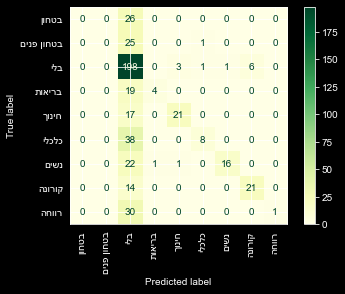

In [79]:
evaluate("-----SVM with TFIDF counts Evaluation-----",y_test, svm_tfidf_predicted,mat_tags)
get_confused_samples(quotes,svm_tfidf_predicted)